## Basis based distance

Explicar porque una distancia en bases puede tener sentido. Conseguir una representación en la base de furier y usar esta distancia para calcular una casso básico de clasificación y comparar con una distancia l2 o simplemente para detectar outliers.

In [23]:
import math

import matplotlib.pyplot as plt
import numpy as np

import skfda
from skfda.preprocessing.smoothing import BasisSmoother

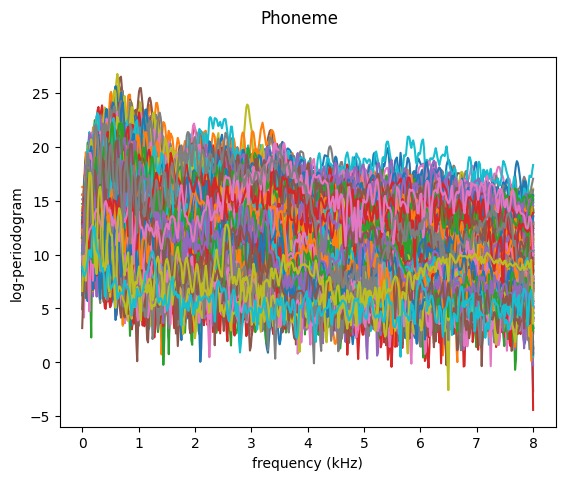

In [24]:
# Load phoneme dataset
dataset = skfda.datasets.fetch_phoneme()
fd = dataset['data'][:300]  # Select first 300 curves

curve = fd

# Plot original curve
curve.plot()
plt.show()


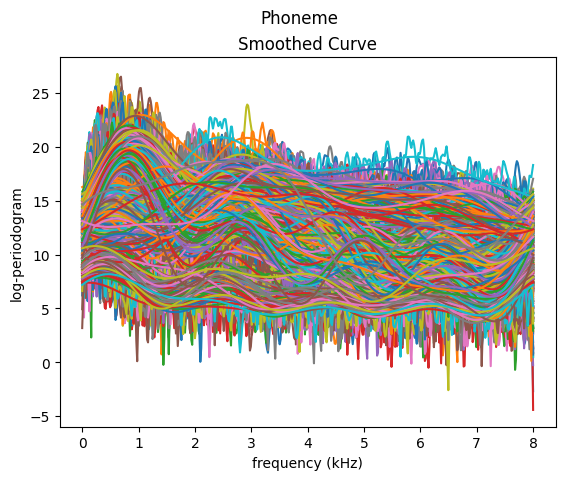

In [27]:
# Determine an appropriate bandwidth based on data characteristics
range = curve.domain_range
basis_temperatures = skfda.representation.basis.FourierBasis(range, n_basis=8)
smoother_temperatures = BasisSmoother(basis=basis_temperatures, return_basis=True)
smooth = smoother_temperatures.fit_transform(curve)

# Plot smoothed curve
fig = curve.plot()
smooth.plot(fig=fig)
plt.title(f"Smoothed Curve")
plt.show()


False

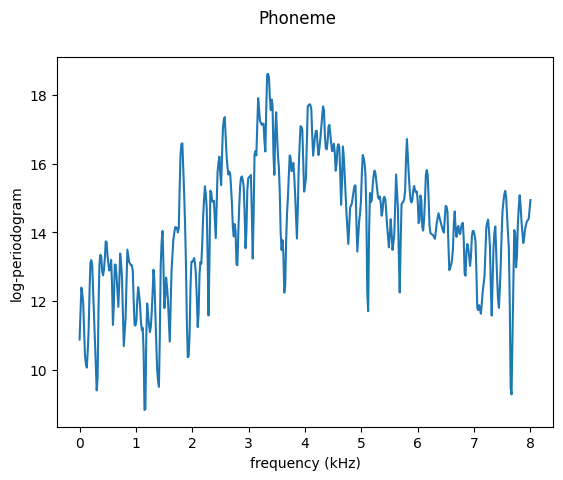

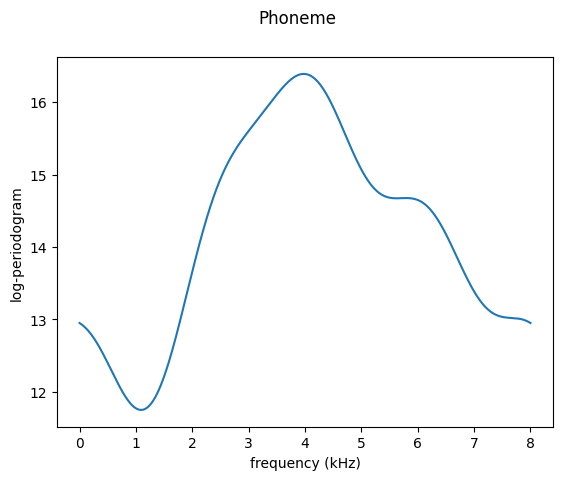

In [28]:
fd[10].plot()
smooth[10].plot()

isinstance(smooth, skfda.FDataGrid)

In [49]:
from skfda.misc.metrics import BasisBasedDistance

weights = np.linspace(0, 1, smooth.basis.n_basis)

# Compute the distance between the original and smoothed curves
distance = BasisBasedDistance(weights=weights)
distance_value = distance(smooth[10], smooth[11])
distance_value

3.8597115414020724

Text(0.5, 1.0, 'Smoothed curves')

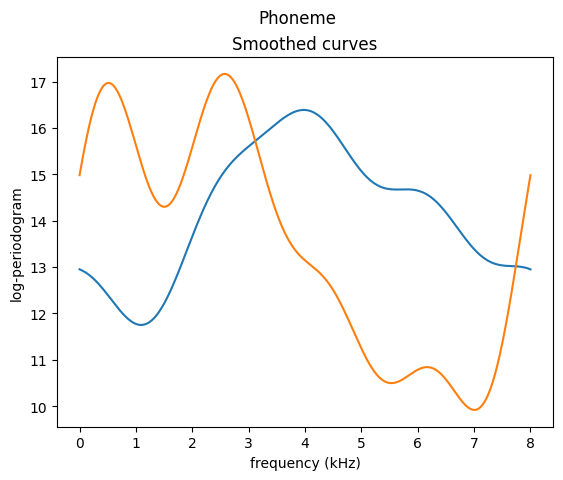

In [47]:
# Plot each series on the same axis
smooth[[10,11]].plot()
plt.title("Smoothed curves")

In [62]:
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans, NearestNeighbors

neigh = NearestNeighbors(n_neighbors=4, metric=distance)
neigh.fit(smooth)


NearestNeighbors(metric=BasisBasedDistance(weights=[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]),
                 n_neighbors=4)

In [63]:
distances, index = neigh.kneighbors(smooth)

ValueError: zero-dimensional arrays cannot be concatenated